<a href="https://colab.research.google.com/github/contatofe/Estudos-e-Desafios/blob/main/Deep%20Learning%20-%20IA%20Expert/Classifica%C3%A7%C3%A3o_Bin%C3%A1ria_Deep_Learning_IA_Expert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas

In [1]:
!pip install scikeras==0.13.0 --quiet
!pip install tensorflow==2.16.1 scikit-learn==1.5.0 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.16.1 which is incompatible.


In [2]:
#Importações

from google.colab import drive

import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
import scikeras
import seaborn as sns

from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras import backend as k

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


#Preparando Dados

In [4]:
X = pd.read_csv('/content/drive/MyDrive/Arquivos - Dados/Curso - Deep Learning/Parte 1 - Redes Neurais Artificiais/classificação binária/entradas_breast.csv')
y = pd.read_csv('/content/drive/MyDrive/Arquivos - Dados/Curso - Deep Learning/Parte 1 - Redes Neurais Artificiais/classificação binária/saidas_breast.csv')

In [60]:
#y = y.values.ravel()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#Criando primeira rede neural

Fórmula para calcular camadas escondidas da rede neural densa:

**(Camadas de entrada (variáveis independentes) + Camadas de Saída (Categorias da variável dependente)) / 2**

Ex.: (30 + 2)/2 = 16

In [19]:
# Arquitetura da rede neural

network = Sequential([
    tf.keras.layers.InputLayer(shape = (30,)),
    tf.keras.layers.Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'),
    tf.keras.layers.Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [20]:
# Criando otimizador

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, clipvalue = 0.5)

In [21]:
# Compilando rede neural

network.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [22]:
# Treinando rede neural

network.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.6180 - loss: 1.3190
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6289 - loss: 0.6145
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7814 - loss: 0.6396
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7609 - loss: 0.5729
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7871 - loss: 0.4531
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8248 - loss: 0.3787
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8015 - loss: 0.4985
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8113 - loss: 0.4590
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8980 - loss: 0.3532
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8801 - loss: 0.3663
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7988 -

Acurácia: 77.62%



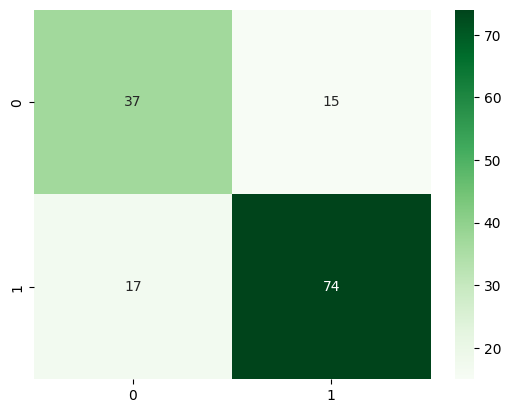

In [42]:
# Gerando previsões e avaliando

pred = network.predict(X_test, verbose = -1)
pred = pred > 0.5

print(f'Acurácia: {accuracy_score(y_test, pred):.2%}\n')

sns.heatmap((confusion_matrix(y_test, pred)), cmap="Greens", annot = True);

# Utilizando validação cruzada

In [5]:
#Função que cria a rede neural

def create_network():
    k.clear_session()
    network = Sequential([
        tf.keras.layers.InputLayer(shape=(30,)),
        tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.5)
    network.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])
    return network

In [6]:
# Modelo de validação cruzada

network = KerasClassifier(model=create_network, epochs=100, batch_size=10, verbose=0)

In [7]:
# Treinando rede neural com 10 pacotes de validação cruzada

results = cross_val_score(estimator=network, X=X, y=y, cv=10, scoring='accuracy')

In [10]:
# Avaliação dos resultados

print(f'Acurácia média: {results.mean():.2%}\nDesvio padrão: {results.std():.2%}')

Acurácia média: 86.82%
Desvio padrão: 3.43%


#Tunando hiperparametros

In [16]:
#Função para criar rede neural que recebe parâmetros customizáveis

def create_network(optimizer, loss, kernel_initializer, activation, neurons):
  k.clear_session()
  network = Sequential([
      tf.keras.layers.InputLayer(shape=(30,)),
      tf.keras.layers.Dense(units=neurons, activation=activation, kernel_initializer=kernel_initializer),
      tf.keras.layers.Dropout(rate = 0.2),
      tf.keras.layers.Dense(units=neurons, activation=activation, kernel_initializer=kernel_initializer),
      tf.keras.layers.Dropout(rate = 0.2),
      tf.keras.layers.Dense(units=1, activation = 'sigmoid')])
  network.compile(optimizer = optimizer, loss = loss, metrics = ['binary_accuracy'])
  return network

In [17]:
# Criando Classificador

network = KerasClassifier(model = create_network)

# Definindo parâmetros - Completo

parameters = {
    'batch_size': [10, 30],
    'epochs': [50, 100],
    'model__optimizer': ['adam', 'sgd'],
    'model__loss': ['binary_crossentropy', 'hinge'],
    'model__kernel_initializer': ['random_uniform', 'normal'],
    'model__activation': ['relu', 'tanh'],
    'model__neurons': [16, 8]
}

# Definindo parâmetros - Reduzido

parameters = {
    'batch_size': [10, 30],
    'epochs': [50],
    'model__optimizer': ['adam'],
    'model__loss': ['binary_crossentropy'],
    'model__kernel_initializer': ['random_uniform', 'normal'],
    'model__activation': ['relu'],
    'model__neurons': [16]
}

In [18]:
# Buscando melhores parâmetros (idealmente utilizar 10 pastas de cross validation)

grid_search = GridSearchCV(estimator = network, param_grid = parameters,
                          scoring = 'accuracy', cv = 5)

# Treinando

grid_search = grid_search.fit(X, y)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.5307 - loss: 2.1240
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5858 - loss: 0.6452
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6561 - loss: 0.6594
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6388 - loss: 0.5511
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7217 - loss: 0.5238
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7824 - loss: 0.4836
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7583 - loss: 0.4418
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7563 - loss: 0.4691
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8084 - loss: 0.4378
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8014 - loss: 0.4383
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7794 - loss: 0.43

In [20]:
#Avaliando parâmetros e acurácia do melhor modelo

print("Melhores parâmetros:", grid_search.best_params_)
print(f"Melhor acurácia: {grid_search.best_score_:.2%}")

Melhores parâmetros: {'batch_size': 10, 'epochs': 50, 'model__activation': 'relu', 'model__kernel_initializer': 'normal', 'model__loss': 'binary_crossentropy', 'model__neurons': 16, 'model__optimizer': 'adam'}
Melhor acurácia: 88.93%
